In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Dataset Creation
data = [
    ("S1", 2, 120, 1),
    ("S2", 10, 450, 2),
    ("S3", 6, 300, 5),
    ("S4", 1, 90, 1),
    ("S5", 8, 220, 3),
    ("S6", 12, 500, 2),
    ("S7", 4, 150, 4),
    ("S8", 7, 350, 3),
]


In [3]:
df = pd.DataFrame(data, columns=["Student", "Books/Month", "Avg Pages/Book", "Genres Diversity"])
print(df)


  Student  Books/Month  Avg Pages/Book  Genres Diversity
0      S1            2             120                 1
1      S2           10             450                 2
2      S3            6             300                 5
3      S4            1              90                 1
4      S5            8             220                 3
5      S6           12             500                 2
6      S7            4             150                 4
7      S8            7             350                 3


In [4]:
# Create feature matrix
students = sorted(set(df["Student"]))
features = ["Books/Month", "Avg Pages/Book", "Genres Diversity"]
feature_matrix = pd.DataFrame(index=students, columns=features)

for _, row in df.iterrows():
    feature_matrix.loc[row["Student"]] = [row["Books/Month"], row["Avg Pages/Book"], row["Genres Diversity"]]

feature_matrix = feature_matrix.astype(float)

In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(feature_matrix)


In [6]:
# Elbow method to find optimal k
inertias = []
for k in range(1, 6):  # Test k from 1 to 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_matrix)
    inertias.append(kmeans.inertia_)

print("Inertias:", inertias)


Inertias: [24.000000000000004, 17.97331646404798, 5.023375552586761, 1.7240563011048624, 0.7305207407596128]


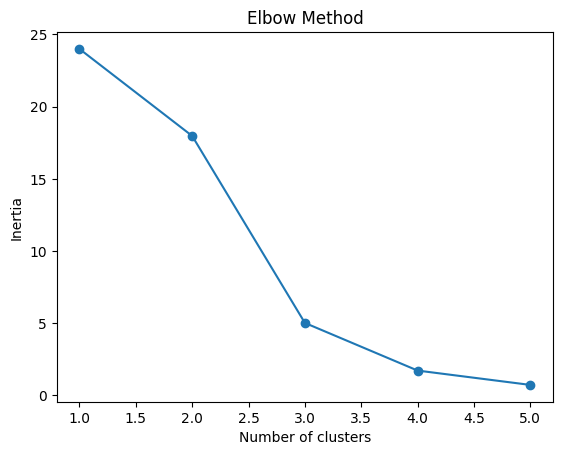

In [7]:
# Plot elbow
plt.plot(range(1, 6), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [8]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_matrix)
cluster_map = dict(zip(students, clusters))
print("Cluster assignments:", cluster_map)


Cluster assignments: {'S1': np.int32(2), 'S2': np.int32(3), 'S3': np.int32(0), 'S4': np.int32(2), 'S5': np.int32(1), 'S6': np.int32(3), 'S7': np.int32(0), 'S8': np.int32(1)}


In [9]:
# For visualization, optional bipartite graph adaptation
B = nx.Graph()

# Create bipartite graph: students and features
for student in students:
    B.add_node(student, bipartite=0)
for feature in features:
    B.add_node(feature, bipartite=1)

for _, row in df.iterrows():
    B.add_edge(row["Student"], "Books/Month", weight=row["Books/Month"])
    B.add_edge(row["Student"], "Avg Pages/Book", weight=row["Avg Pages/Book"])
    B.add_edge(row["Student"], "Genres Diversity", weight=row["Genres Diversity"])

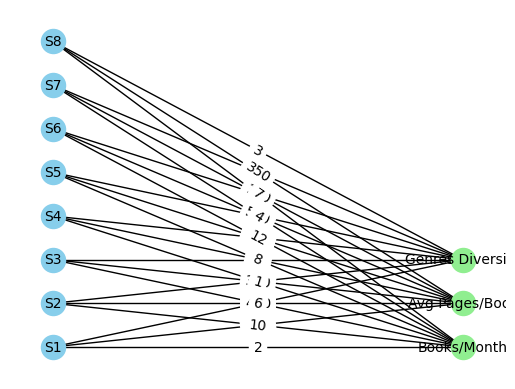

In [10]:
# Separate sets
student_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
feature_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]

# Layout for bipartite
pos = dict()
pos.update((node, (0, i)) for i, node in enumerate(student_nodes))
pos.update((node, (1, i)) for i, node in enumerate(feature_nodes))

# Draw nodes
nx.draw_networkx_nodes(B, pos, nodelist=student_nodes, node_color='skyblue', label='Students')
nx.draw_networkx_nodes(B, pos, nodelist=feature_nodes, node_color='lightgreen', label='Features')

# Draw edges with labels
nx.draw_networkx_edges(B, pos)
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

# Node labels
nx.draw_networkx_labels(B, pos, font_size=10)

plt.axis('off')
plt.show()

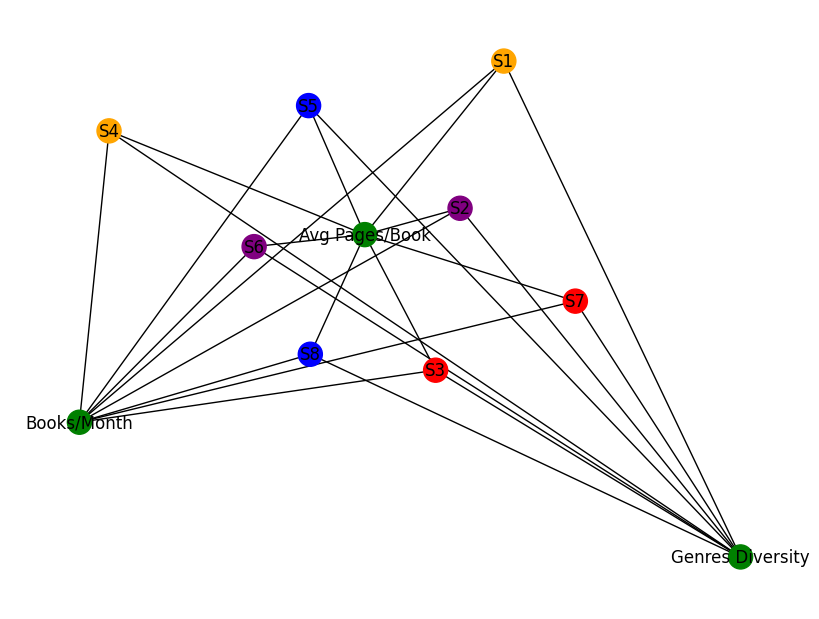

In [11]:
# Visualization with clusters
pos = nx.spring_layout(B, seed=42)
node_colors = []

for node in B.nodes():
    if node in cluster_map:
        color_map = {0: 'red', 1: 'blue', 2: 'orange', 3: 'purple'}
        node_colors.append(color_map[cluster_map[node]])
    else:
        node_colors.append('green')

plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=True, node_color=node_colors)
plt.show()